In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import scipy
import numpy
import time
import json
import sys
import csv
import os


In [2]:
networks = sns.load_dataset("brain_networks", index_col=0, header=[0, 1, 2])
network_labels = networks.columns.get_level_values("network")
network_pal = sns.cubehelix_palette(network_labels.unique().size, light=.9, dark=.1, reverse=True, start=1, rot=-2)
network_lut = dict(zip(map(str, network_labels.unique()), network_pal))

In [3]:
network_colors = pd.Series(network_labels, index=networks.columns).map(network_lut)

In [4]:
node_labels = networks.columns.get_level_values("node")
node_pal = sns.cubehelix_palette(node_labels.unique().size)
node_lut = dict(zip(map(str, node_labels.unique()), node_pal))

In [5]:
node_colors = pd.Series(node_labels, index=networks.columns).map(node_lut)

In [6]:
network_node_colors = pd.DataFrame(network_colors).join(pd.DataFrame(node_colors))

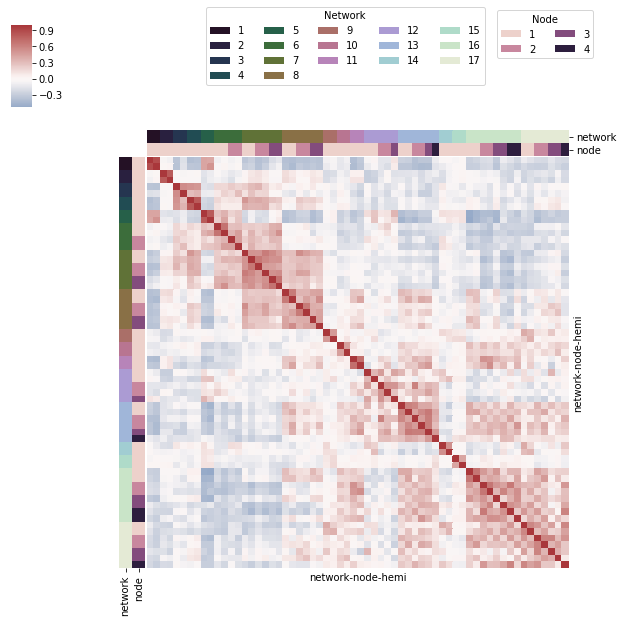

In [7]:
g = sns.clustermap(networks.corr(),
# Turn off the clustering
row_cluster=False, col_cluster=False,
# Add colored class labels using data frame created from node and network colors
row_colors = network_node_colors,
col_colors = network_node_colors,
# Make the plot look better when many rows/cols
linewidths=0,
xticklabels=False, yticklabels=False,
center=0, cmap="vlag")

for label in network_labels.unique():
    g.ax_col_dendrogram.bar(0, 0, color=network_lut[label], label=label, linewidth=0)

l1 = g.ax_col_dendrogram.legend(title='Network', loc="center", ncol=5, bbox_to_anchor=(0.47, 0.8))

for label in node_labels.unique():
    g.ax_row_dendrogram.bar(0, 0, color=node_lut[label], label=label, linewidth=0)

l2 = g.ax_row_dendrogram.legend(title='Node', loc="center", ncol=2, bbox_to_anchor=(5, 1.3))


In [8]:
# Make a sample dataframe for checking if pandas or seaborn functions work as I expect and try variations
a = pd.DataFrame(np.random.random_sample((100,100)))

In [76]:
b = pd.DataFrame(index = network_labels.unique())
b['test']= 1
b

,test
network,
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


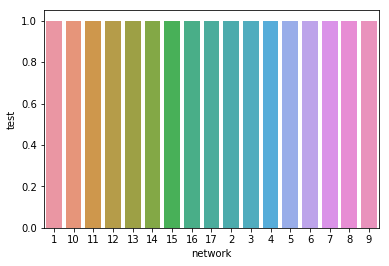

In [83]:
sns.barplot(x=b.index, y=b.test)

In [65]:
sns.palplot(network_colors)

AttributeError: module 'seaborn' has no attribute 'palploth'